In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [109]:
temp_filename = 'data/block_'
filename = temp_filename +str(1)+'.csv'
df = pd.read_csv(filename)
for i in range(2,11):
    filename = temp_filename + str(i)+'.csv'
    df_c = pd.read_csv(filename)
    df = pd.concat([df, df_c])

In [110]:
df.shape

(5749132, 12)

In [111]:
df = df.replace('?', np.NaN)

In [112]:
for col in df.columns[2:-1]:
    df[col] = df[col].apply(float)
    
df.head()

,id_1,id_2,cmp_fname_c1,cmp_fname_c2,cmp_lname_c1,cmp_lname_c2,cmp_sex,cmp_bd,cmp_bm,cmp_by,cmp_plz,is_match
0,37291,53113,0.833333,NaN,1.0,NaN,1.0,1.0,1.0,1.0,0.0,True
1,39086,47614,1.000000,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,True
2,70031,70237,1.000000,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,True
3,84795,97439,1.000000,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,True
4,36950,42116,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,True


In [113]:
distribution = df.isna().apply(pd.Series.value_counts).T.replace(np.NaN, 0)
distribution.columns = ['Not null', 'Is null']
distribution

,Not null,Is null
id_1,5749132.0,0.0
id_2,5749132.0,0.0
cmp_fname_c1,5748125.0,1007.0
cmp_fname_c2,103698.0,5645434.0
cmp_lname_c1,5749132.0,0.0
cmp_lname_c2,2464.0,5746668.0
cmp_sex,5749132.0,0.0
cmp_bd,5748337.0,795.0
cmp_bm,5748337.0,795.0
cmp_by,5748337.0,795.0


In [114]:
df_match = df[df['is_match']==True]
num_match = df_match.shape[0]
df_not_match = df[df['is_match']==False]
num_not_match = df_not_match.shape[0]

In [115]:
distribution_match = df_match.isna().apply(pd.Series.value_counts).T.replace(np.NaN, 0)
distribution_match.columns = ['Not null', 'Is null']
distribution_match/num_match

,Not null,Is null
id_1,1.000000,0.000000
id_2,1.000000,0.000000
cmp_fname_c1,0.999570,0.000430
cmp_fname_c2,0.063685,0.936315
cmp_lname_c1,1.000000,0.000000
cmp_lname_c2,0.022694,0.977306
cmp_sex,1.000000,0.000000
cmp_bd,0.999713,0.000287
cmp_bm,0.999713,0.000287
cmp_by,0.999713,0.000287


In [116]:
distribution_not_match = df_not_match.isna().apply(pd.Series.value_counts).T.replace(np.NaN, 0)
distribution_not_match.columns = ['Not null', 'Is null']
distribution_not_match/num_not_match

,Not null,Is null
id_1,1.000000,0.000000
id_2,1.000000,0.000000
cmp_fname_c1,0.999826,0.000174
cmp_fname_c2,0.017870,0.982130
cmp_lname_c1,1.000000,0.000000
cmp_lname_c2,0.000347,0.999653
cmp_sex,1.000000,0.000000
cmp_bd,0.999862,0.000138
cmp_bm,0.999862,0.000138
cmp_by,0.999862,0.000138


In [148]:
def bin_values(val):
    if val>=0 and val<=1:
        return '0-1'
    elif val>1 and val<=2:
        return '1-2'
    elif val>2 and val<=3:
        return '2-3'
    elif val>3 and val<=4:
        return '3-4'
    elif val>4 and val<=5:
        return '4-5'
    elif val>5 and val<=6:
        return '5-6'
    elif val>6 and val<=7:
        return '6-7'
    elif val>7 and val<=8:
        return '7-8'
    elif val>8 and val<=9:
        return '8-9'
    elif val>9 and val<=10:
        return '9-10'

In [193]:
similarity_all_col = pd.DataFrame(df[df.columns[2:-1]].replace(np.NaN, 0).sum(axis=1), columns=['sum'])
similarity_all_col['is_match'] = df['is_match']
similarity_all_col.head()

,sum,is_match
0,5.833333,True
1,7.000000,True
2,7.000000,True
3,7.000000,True
4,8.000000,True


In [194]:
not_match_sim_all_col =similarity_all_col[similarity_all_col['is_match']==False]
print(not_match_sim_all_col.sort_values('sum', ascending=True).head(1))
print(not_match_sim_all_col.sort_values('sum', ascending=False).head(1))

        sum  is_match
207251  1.0     False
        sum  is_match
571239  6.5     False


In [195]:
match_sim_all_col =similarity_all_col[similarity_all_col['is_match']==True]
print(match_sim_all_col.sort_values('sum', ascending=True).head(1))
print(match_sim_all_col.sort_values('sum', ascending=False).head(1))

      sum  is_match
1180  3.9      True
      sum  is_match
1174  9.0      True


In [153]:
bin_sim_all_col = pd.DataFrame(similarity_all_col['sum'].apply(bin_values))
bin_sim_all_col['is_match'] = df['is_match']

6-7    19219
5-6     1191
7-8      435
4-5       71
3-4       15
Name: sum, dtype: int64


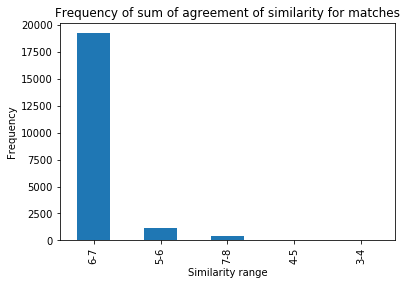

In [196]:
match_bin_sim_all_col = bin_sim_all_col[bin_sim_all_col['is_match']==True]
print(match_bin_sim_all_col['sum'].value_counts())
match_bin_sim_all_col['sum'].value_counts().plot(kind='bar')
plt.title('Frequency of sum of agreement of similarity for matches')
plt.xlabel('Similarity range')
plt.ylabel('Frequency')
plt.show()

3-4    2729922
2-3    2064641
1-2     663813
4-5     264498
5-6       2777
0-1       2543
6-7          7
Name: sum, dtype: int64


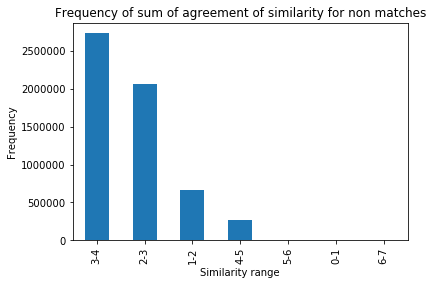

In [197]:
not_match_bin_sim_all_col = bin_sim_all_col[bin_sim_all_col['is_match']==False]
print(not_match_bin_sim_all_col['sum'].value_counts())
not_match_bin_sim_all_col['sum'].value_counts().plot(kind='bar')
plt.title('Frequency of sum of agreement of similarity for non matches')
plt.xlabel('Similarity range')
plt.ylabel('Frequency')
plt.show()

In [202]:
print('Column Removed: '+df.columns[2])
similarity_all_col = pd.DataFrame(df.drop(['id_2','id_1', df.columns[2], 'is_match'],axis=1).replace(np.NaN, 0).sum(axis=1), columns=['sum'])
similarity_all_col['is_match'] = df['is_match']
similarity_all_col.head()

,sum,is_match
0,5.0,True
1,6.0,True
2,6.0,True
3,6.0,True
4,7.0,True


In [203]:
not_match_sim_all_col =similarity_all_col[similarity_all_col['is_match']==False]
print(not_match_sim_all_col.sort_values('sum', ascending=True).head(1))
print(not_match_sim_all_col.sort_values('sum', ascending=False).head(1))

        sum  is_match
300908  1.0     False
        sum  is_match
456458  6.0     False


In [204]:
match_sim_all_col =similarity_all_col[similarity_all_col['is_match']==True]
print(match_sim_all_col.sort_values('sum', ascending=True).head(1))
print(match_sim_all_col.sort_values('sum', ascending=False).head(1))

     sum  is_match
133  3.0      True
     sum  is_match
604  8.0      True


In [205]:
bin_sim_all_col = pd.DataFrame(similarity_all_col['sum'].apply(bin_values))
bin_sim_all_col['is_match'] = df['is_match']

5-6    18061
6-7     1664
4-5     1115
3-4       65
7-8       14
2-3       12
Name: sum, dtype: int64


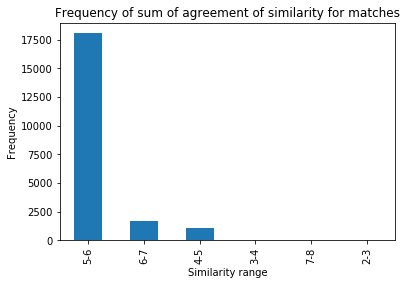

In [206]:
match_bin_sim_all_col = bin_sim_all_col[bin_sim_all_col['is_match']==True]
print(match_bin_sim_all_col['sum'].value_counts())
match_bin_sim_all_col['sum'].value_counts().plot(kind='bar')
plt.title('Frequency of sum of agreement of similarity for matches')
plt.xlabel('Similarity range')
plt.ylabel('Frequency')
plt.show()

2-3    2951965
1-2    2270213
3-4     352363
4-5     116354
0-1      37039
5-6        267
Name: sum, dtype: int64


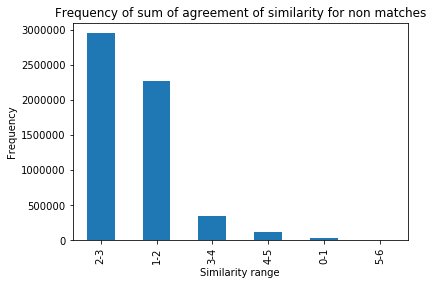

In [207]:
not_match_bin_sim_all_col = bin_sim_all_col[bin_sim_all_col['is_match']==False]
print(not_match_bin_sim_all_col['sum'].value_counts())
not_match_bin_sim_all_col['sum'].value_counts().plot(kind='bar')
plt.title('Frequency of sum of agreement of similarity for non matches')
plt.xlabel('Similarity range')
plt.ylabel('Frequency')
plt.show()

In [208]:
print('Column Removed: '+df.columns[3])
similarity_all_col = pd.DataFrame(df.drop(['id_2','id_1', df.columns[3], 'is_match'],axis=1).replace(np.NaN, 0).sum(axis=1), columns=['sum'])
similarity_all_col['is_match'] = df['is_match']
similarity_all_col.head()

,sum,is_match
0,5.833333,True
1,7.000000,True
2,7.000000,True
3,7.000000,True
4,8.000000,True


In [209]:
not_match_sim_all_col =similarity_all_col[similarity_all_col['is_match']==False]
print(not_match_sim_all_col.sort_values('sum', ascending=True).head(1))
print(not_match_sim_all_col.sort_values('sum', ascending=False).head(1))

        sum  is_match
197020  1.0     False
             sum  is_match
534722  6.333333     False


In [210]:
match_sim_all_col =similarity_all_col[similarity_all_col['is_match']==True]
print(match_sim_all_col.sort_values('sum', ascending=True).head(1))
print(match_sim_all_col.sort_values('sum', ascending=False).head(1))

      sum  is_match
1180  3.9      True
      sum  is_match
1187  8.0      True


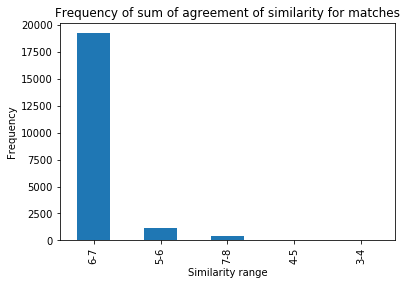

In [211]:
bin_sim_all_col = pd.DataFrame(similarity_all_col['sum'].apply(bin_values))
bin_sim_all_col['is_match'] = df['is_match']
match_bin_sim_all_col = bin_sim_all_col[bin_sim_all_col['is_match']==True]
match_bin_sim_all_col['sum'].value_counts().plot(kind='bar')
plt.title('Frequency of sum of agreement of similarity for matches')
plt.xlabel('Similarity range')
plt.ylabel('Frequency')
plt.show()

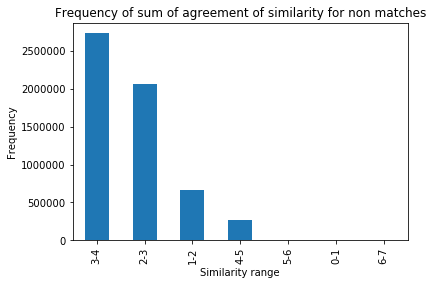

In [212]:
not_match_bin_sim_all_col = bin_sim_all_col[bin_sim_all_col['is_match']==False]
not_match_bin_sim_all_col['sum'].value_counts().plot(kind='bar')
plt.title('Frequency of sum of agreement of similarity for non matches')
plt.xlabel('Similarity range')
plt.ylabel('Frequency')
plt.show()

In [213]:
print('Column Removed: '+df.columns[4])
similarity_all_col = pd.DataFrame(df.drop(['id_2','id_1', df.columns[4], 'is_match'],axis=1).replace(np.NaN, 0).sum(axis=1), columns=['sum'])
similarity_all_col['is_match'] = df['is_match']
similarity_all_col.head()

,sum,is_match
0,4.833333,True
1,6.000000,True
2,6.000000,True
3,6.000000,True
4,7.000000,True


In [214]:
not_match_sim_all_col =similarity_all_col[similarity_all_col['is_match']==False]
print(not_match_sim_all_col.sort_values('sum', ascending=True).head(1))
print(not_match_sim_all_col.sort_values('sum', ascending=False).head(1))

        sum  is_match
409454  1.0     False
             sum  is_match
562117  6.166667     False


In [215]:
match_sim_all_col =similarity_all_col[similarity_all_col['is_match']==True]
print(match_sim_all_col.sort_values('sum', ascending=True).head(1))
print(match_sim_all_col.sort_values('sum', ascending=False).head(1))

      sum  is_match
1180  2.9      True
      sum  is_match
1546  8.0      True


5-6    18058
6-7     1669
4-5     1109
3-4       67
7-8       15
2-3       13
Name: sum, dtype: int64


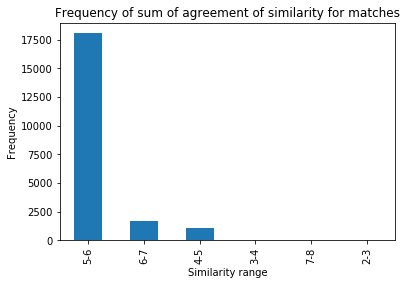

In [216]:
bin_sim_all_col = pd.DataFrame(similarity_all_col['sum'].apply(bin_values))
bin_sim_all_col['is_match'] = df['is_match']
match_bin_sim_all_col = bin_sim_all_col[bin_sim_all_col['is_match']==True]
print(match_bin_sim_all_col['sum'].value_counts())
match_bin_sim_all_col['sum'].value_counts().plot(kind='bar')
plt.title('Frequency of sum of agreement of similarity for matches')
plt.xlabel('Similarity range')
plt.ylabel('Frequency')
plt.show()

2-3    3824998
1-2    1059483
3-4     415464
0-1     307821
4-5     120057
5-6        377
6-7          1
Name: sum, dtype: int64


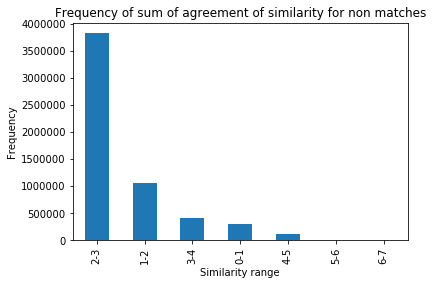

In [217]:
not_match_bin_sim_all_col = bin_sim_all_col[bin_sim_all_col['is_match']==False]
print(not_match_bin_sim_all_col['sum'].value_counts())
not_match_bin_sim_all_col['sum'].value_counts().plot(kind='bar')
plt.title('Frequency of sum of agreement of similarity for non matches')
plt.xlabel('Similarity range')
plt.ylabel('Frequency')
plt.show()

In [225]:
print('Column Removed: '+df.columns[5])
similarity_all_col = pd.DataFrame(df.drop(['id_2','id_1', df.columns[5], 'is_match'],axis=1).replace(np.NaN, 0).sum(axis=1), columns=['sum'])
similarity_all_col['is_match'] = df['is_match']
similarity_all_col.head()

Column Removed: cmp_lname_c2


,sum,is_match
0,5.833333,True
1,7.000000,True
2,7.000000,True
3,7.000000,True
4,7.000000,True


In [219]:
not_match_sim_all_col =similarity_all_col[similarity_all_col['is_match']==False]
print(not_match_sim_all_col.sort_values('sum', ascending=True).head(1))
print(not_match_sim_all_col.sort_values('sum', ascending=False).head(1))

        sum  is_match
503570  1.0     False
        sum  is_match
571239  6.5     False


In [220]:
match_sim_all_col =similarity_all_col[similarity_all_col['is_match']==True]
print(match_sim_all_col.sort_values('sum', ascending=True).head(1))
print(match_sim_all_col.sort_values('sum', ascending=False).head(1))

      sum  is_match
1180  3.9      True
      sum  is_match
2005  8.0      True


6-7    18443
7-8     1256
5-6     1148
4-5       70
3-4       14
Name: sum, dtype: int64


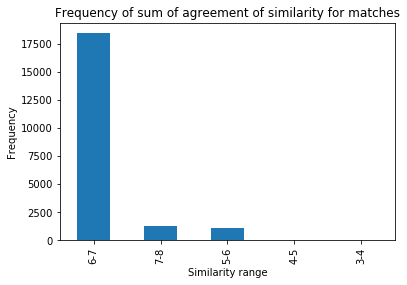

In [221]:
bin_sim_all_col = pd.DataFrame(similarity_all_col['sum'].apply(bin_values))
bin_sim_all_col['is_match'] = df['is_match']
match_bin_sim_all_col = bin_sim_all_col[bin_sim_all_col['is_match']==True]
print(match_bin_sim_all_col['sum'].value_counts())
match_bin_sim_all_col['sum'].value_counts().plot(kind='bar')
plt.title('Frequency of sum of agreement of similarity for matches')
plt.xlabel('Similarity range')
plt.ylabel('Frequency')
plt.show()

3-4    2700632
2-3    2037189
1-2     662155
4-5     320034
5-6       5592
0-1       2543
6-7         56
Name: sum, dtype: int64


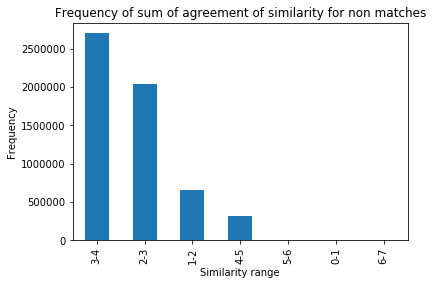

In [222]:
not_match_bin_sim_all_col = bin_sim_all_col[bin_sim_all_col['is_match']==False]
print(not_match_bin_sim_all_col['sum'].value_counts())
not_match_bin_sim_all_col['sum'].value_counts().plot(kind='bar')
plt.title('Frequency of sum of agreement of similarity for non matches')
plt.xlabel('Similarity range')
plt.ylabel('Frequency')
plt.show()

In [226]:
print('Column Removed: '+df.columns[6])
similarity_all_col = pd.DataFrame(df.drop(['id_2','id_1', df.columns[6], 'is_match'],axis=1).replace(np.NaN, 0).sum(axis=1), columns=['sum'])
similarity_all_col['is_match'] = df['is_match']
similarity_all_col.head()

Column Removed: cmp_sex


,sum,is_match
0,4.833333,True
1,6.000000,True
2,6.000000,True
3,6.000000,True
4,7.000000,True


In [227]:
not_match_sim_all_col =similarity_all_col[similarity_all_col['is_match']==False]
print(not_match_sim_all_col.sort_values('sum', ascending=True).head(1))
print(not_match_sim_all_col.sort_values('sum', ascending=False).head(1))

        sum  is_match
508200  0.0     False
        sum  is_match
571239  5.5     False


In [228]:
match_sim_all_col =similarity_all_col[similarity_all_col['is_match']==True]
print(match_sim_all_col.sort_values('sum', ascending=True).head(1))
print(match_sim_all_col.sort_values('sum', ascending=False).head(1))

      sum  is_match
1180  2.9      True
      sum  is_match
1174  8.0      True


5-6    18256
6-7     1672
4-5      942
3-4       33
7-8       15
2-3       13
Name: sum, dtype: int64


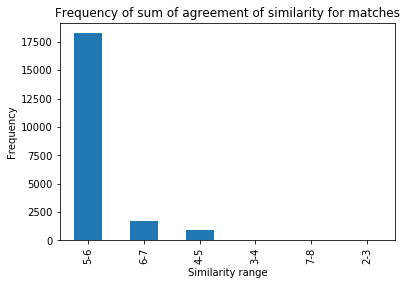

In [229]:
bin_sim_all_col = pd.DataFrame(similarity_all_col['sum'].apply(bin_values))
bin_sim_all_col['is_match'] = df['is_match']
match_bin_sim_all_col = bin_sim_all_col[bin_sim_all_col['is_match']==True]
print(match_bin_sim_all_col['sum'].value_counts())
match_bin_sim_all_col['sum'].value_counts().plot(kind='bar')
plt.title('Frequency of sum of agreement of similarity for matches')
plt.xlabel('Similarity range')
plt.ylabel('Frequency')
plt.show()

2-3    2627443
1-2    2011503
0-1     619583
3-4     463539
4-5       6076
5-6         57
Name: sum, dtype: int64


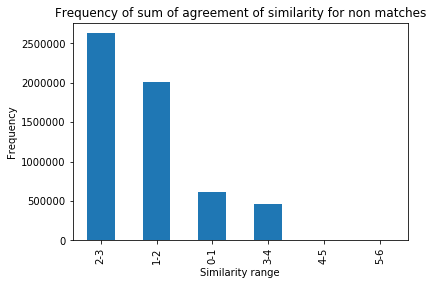

In [230]:
not_match_bin_sim_all_col = bin_sim_all_col[bin_sim_all_col['is_match']==False]
print(not_match_bin_sim_all_col['sum'].value_counts())
not_match_bin_sim_all_col['sum'].value_counts().plot(kind='bar')
plt.title('Frequency of sum of agreement of similarity for non matches')
plt.xlabel('Similarity range')
plt.ylabel('Frequency')
plt.show()

In [231]:
print('Column Removed: '+df.columns[7])
similarity_all_col = pd.DataFrame(df.drop(['id_2','id_1', df.columns[7], 'is_match'],axis=1).replace(np.NaN, 0).sum(axis=1), columns=['sum'])
similarity_all_col['is_match'] = df['is_match']
similarity_all_col.head()

Column Removed: cmp_bd


,sum,is_match
0,4.833333,True
1,6.000000,True
2,6.000000,True
3,6.000000,True
4,7.000000,True


In [232]:
not_match_sim_all_col =similarity_all_col[similarity_all_col['is_match']==False]
print(not_match_sim_all_col.sort_values('sum', ascending=True).head(1))
print(not_match_sim_all_col.sort_values('sum', ascending=False).head(1))

        sum  is_match
558232  0.0     False
         sum  is_match
215567  5.75     False


In [233]:
match_sim_all_col =similarity_all_col[similarity_all_col['is_match']==True]
print(match_sim_all_col.sort_values('sum', ascending=True).head(1))
print(match_sim_all_col.sort_values('sum', ascending=False).head(1))

     sum  is_match
358  3.0      True
      sum  is_match
1546  8.0      True


5-6    18075
6-7     1670
4-5     1104
3-4       66
7-8       14
2-3        2
Name: sum, dtype: int64


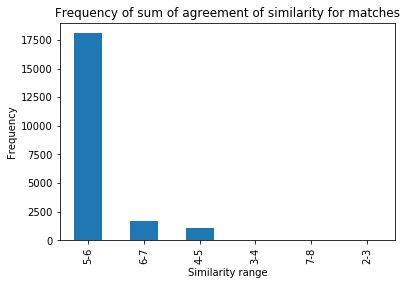

In [234]:
bin_sim_all_col = pd.DataFrame(similarity_all_col['sum'].apply(bin_values))
bin_sim_all_col['is_match'] = df['is_match']
match_bin_sim_all_col = bin_sim_all_col[bin_sim_all_col['is_match']==True]
print(match_bin_sim_all_col['sum'].value_counts())
match_bin_sim_all_col['sum'].value_counts().plot(kind='bar')
plt.title('Frequency of sum of agreement of similarity for matches')
plt.xlabel('Similarity range')
plt.ylabel('Frequency')
plt.show()

2-3    2430384
3-4    2209657
1-2     971325
4-5     102452
0-1      12974
5-6       1409
Name: sum, dtype: int64


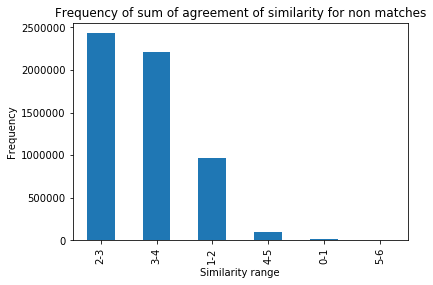

In [235]:
not_match_bin_sim_all_col = bin_sim_all_col[bin_sim_all_col['is_match']==False]
print(not_match_bin_sim_all_col['sum'].value_counts())
not_match_bin_sim_all_col['sum'].value_counts().plot(kind='bar')
plt.title('Frequency of sum of agreement of similarity for non matches')
plt.xlabel('Similarity range')
plt.ylabel('Frequency')
plt.show()